**/kaggle/input/mortgage-based-predictions/LoanExport.csv**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mortgage-based-predictions/LoanExport.csv
/kaggle/input/mortgage-based-predictions/Final Data.csv


AIM:-To predict the mortgage backed securities prepayment risk using ml models Mortgage backed securities:- Firstly mortgage means people take loan from banks and banks issue them loans on thier credit profile,investments and certain proofs and they give those docs when loan tenure is finished.So these security papers are collected in a set and are sold to invesment banks and they are locked.now the investors gets profit from the intrests they pay.so if a customer pre pays the ammount investor might lose some profit.so we have to predict whether a customer will prepay or not.

CreditScore:-
FirstPaymentDate:-
FirstTimeHomebuyer:- 
MaturityDate:- 
MSA(marketing service agremment)-5digit MIP-
mortgage insurance percentage
Units 
Occupancy 
OCLTV-ratio of all secured loans on a property to the total value of property
DTI-debit to income ratio 
OrigUPB-orginal unpaid balance LTV 
OrigInterestRate Channel 
PPM-prepayment penalty mortgage 
ProductType 
PropertyState 
PropertyType 
PostalCode 
LoanSeqNum 
LoanPurpose 
OrigLoanTerm 
NumBorrowers 
SellerName 
ServicerName 
EverDelinquent 
MonthsDelinquent 
MonthsInRepayment

importing required libraries

In [2]:
#Import the required Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

1. Reading the Input Data from File****

In [3]:
df_train=pd.read_csv("/kaggle/input/mortgage-based-predictions/LoanExport.csv",low_memory=False)
df_train.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


2. Understanding structure of the Data

In [4]:
# Getting the Dataframe dimensions
df_train.shape

(291451, 28)

In [5]:
# Getting the columns information
df_train.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [6]:
 categoricalcolumns=[]
 numericalcolumns=[]
 for i in df_train.columns:
   if df_train[i].dtypes==object:
      categoricalcolumns.append(i)
   else:
      numericalcolumns.append(i)
print(numericalcolumns) 
print(categoricalcolumns)

['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyState', 'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose', 'NumBorrowers', 'SellerName', 'ServicerName']


In [7]:
for i in categoricalcolumns:
  print(i,df_train[i].nunique())

    


FirstTimeHomebuyer 3
MSA 392
Occupancy 3
Channel 4
PPM 3
ProductType 1
PropertyState 53
PropertyType 7
PostalCode 892
LoanSeqNum 291451
LoanPurpose 3
NumBorrowers 3
SellerName 20
ServicerName 20


#columns such as MSA,propertystate,postalcode,loanseqnum,sellername,servicename might not hold that much importance because of so many unique values present in them


In [8]:
#checking whether our column has proper dtype or not
df_train["EverDelinquent"].value_counts()

0    233788
1     57663
Name: EverDelinquent, dtype: int64

if we see there are two classes present in it,so it is a categorical column

In [9]:
df_train["EverDelinquent"]=df_train["EverDelinquent"].astype("str")

In [10]:
# Basic Info of the Data Frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [11]:
# Getting basic statistical details of the data frame
df_train.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,180.000000,212.000000


3. Data Quality Check And Missing Values

3.1 Percentage of missing values for columns and rows

In [12]:
# checking column-wise null percentages
cols = pd.DataFrame(df_train.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                    precentage_missing_value
CreditScore                             0.00
EverDelinquent                          0.00
ServicerName                            0.00
NumBorrowers                            0.00
OrigLoanTerm                            0.00
LoanPurpose                             0.00
LoanSeqNum                              0.00
PostalCode                              0.00
PropertyType                            0.00
PropertyState                           0.00
ProductType                             0.00
PPM                                     0.00
MonthsDelinquent                        0.00
Channel                                 0.00
LTV                                     0.00
OrigUPB                                 0.00
DTI                                     0.00
OCLTV                                   0.00
Occupancy                               0.00
Units                                   0.00
MIP                                     0.00
MSA       

#only Seller Name has missing values

In [13]:
#if we observe maturitydate,firstpaymentdate,the difference of these columns is origloanterm so we can exclude these columns
##columns such as MSA,propertystate,postalcode,loanseqnum,sellername,servicename might not hold that much importance because of so many unique values present in them
#so we can drop columns such as maturitydate,firstpaymentdate,MSA,propertystate,postalcode,loanseqnum,sellername,servicename

In [14]:
categoricalcolumns

['FirstTimeHomebuyer',
 'MSA',
 'Occupancy',
 'Channel',
 'PPM',
 'ProductType',
 'PropertyState',
 'PropertyType',
 'PostalCode',
 'LoanSeqNum',
 'LoanPurpose',
 'NumBorrowers',
 'SellerName',
 'ServicerName']

In [15]:
df_train=df_train.drop(['MSA','PropertyState','PostalCode','LoanSeqNum','SellerName','ServicerName','FirstPaymentDate', 'MaturityDate'],axis=1)

In [16]:
categoricalcolumns=[]
numericalcolumns=[]
for i in df_train.columns:
   if df_train[i].dtypes==object:
      categoricalcolumns.append(i)
   else:
      numericalcolumns.append(i)
print(numericalcolumns) 
print(categoricalcolumns)

['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyType', 'LoanPurpose', 'NumBorrowers', 'EverDelinquent']


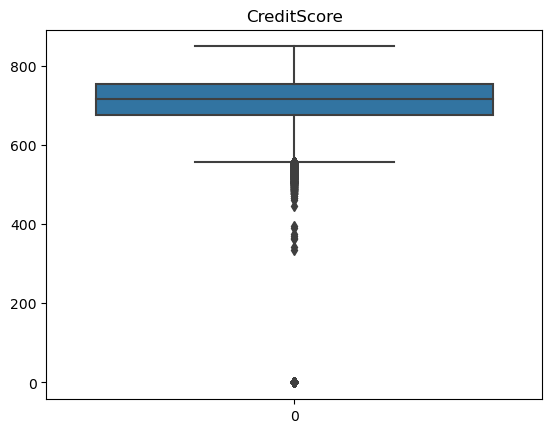

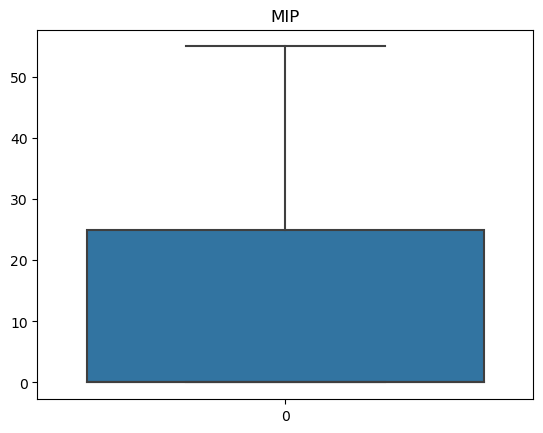

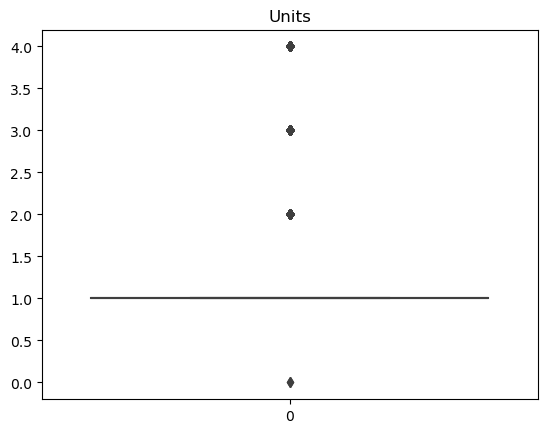

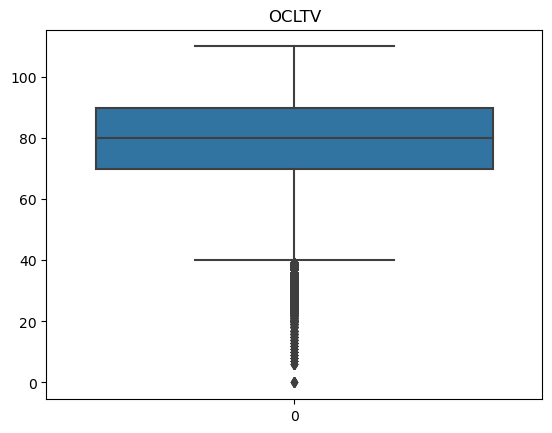

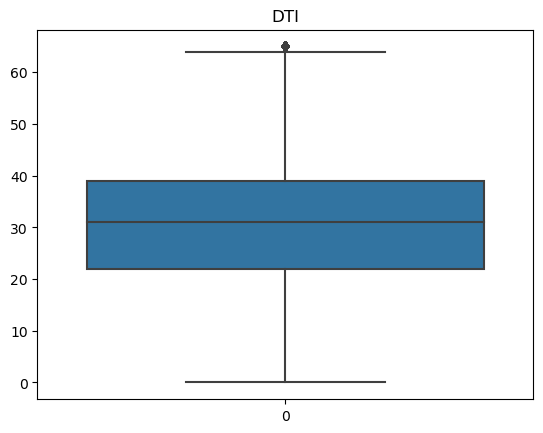

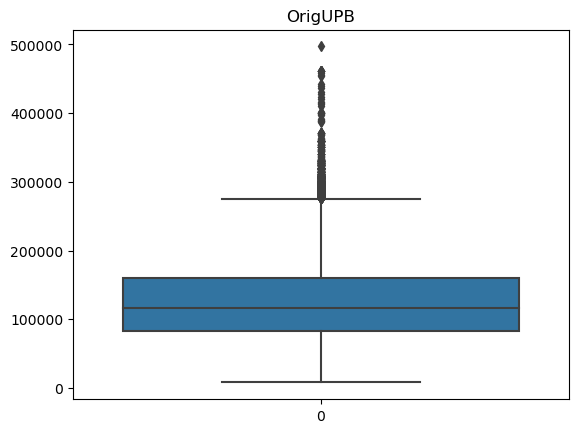

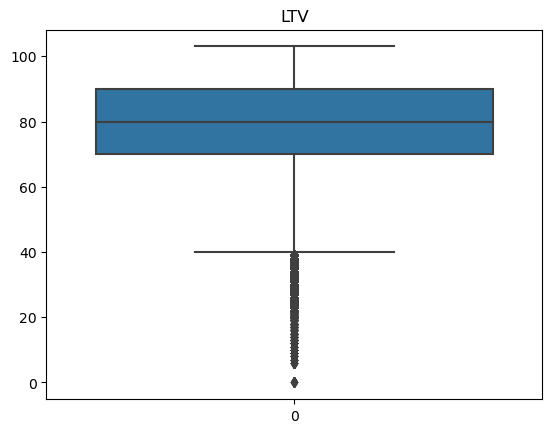

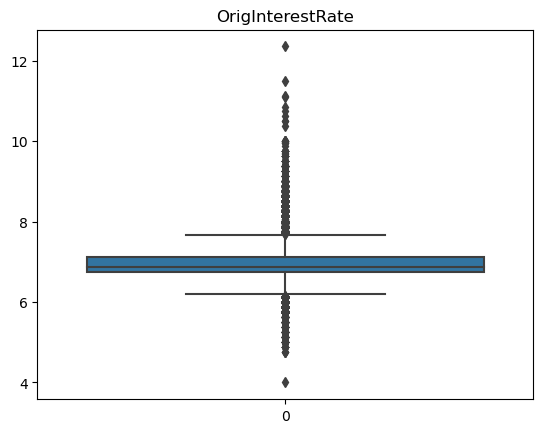

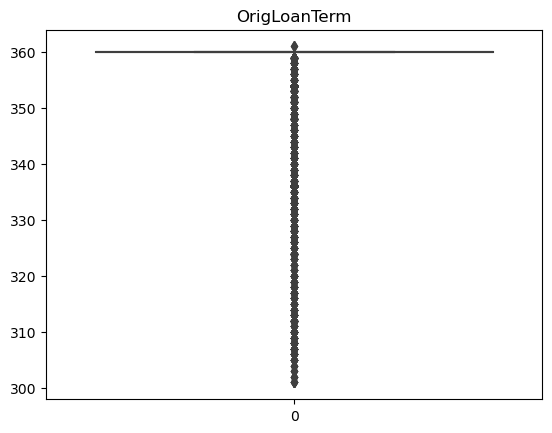

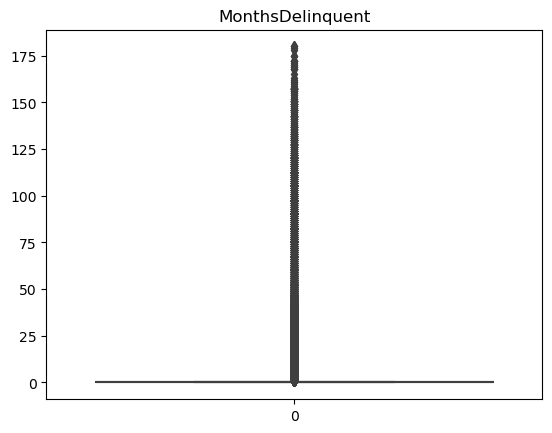

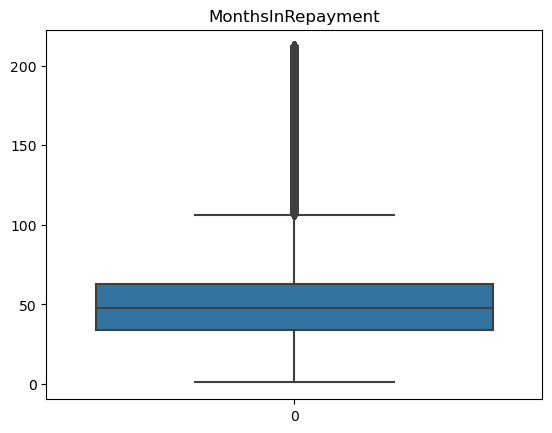

In [17]:
for i in numericalcolumns:
    fig, ax = plt.subplots()
    sns.boxplot(df_train[i], ax=ax)
    ax.set_title(i)
    plt.show()    
    

In [18]:
#rechecking once again
df_train.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,N,25,1,O,89,27,117000,89,6.750,T,N,FRM,SF,P,360,2,0,0,52
1,0,N,0,1,O,73,17,109000,73,6.500,R,N,FRM,SF,N,360,1,0,0,144
2,0,N,0,1,O,75,16,88000,75,6.875,T,N,FRM,SF,N,360,2,0,0,67
3,0,N,0,1,O,76,14,160000,76,6.875,R,N,FRM,SF,N,360,2,0,0,35
4,0,N,0,1,O,78,18,109000,78,7.125,R,N,FRM,SF,N,360,2,0,0,54


for outlier analysis we will focus on
 1)'CreditScore',
 4)'MIP',
 5)'Units',
 6)'OCLTV',
 7)'DTI',
 8)'OrigUPB',
 9)'LTV',
 10)'OrigInterestRate',
 11)'OrigLoanTerm',
 12)'EverDelinquent',
 13)'MonthsDelinquent',
 14)'MonthsInRepayment'


In [19]:
#percentage of outliers present in each column
for i in numericalcolumns:
    
 IQR = (df_train[i]).quantile(0.75) - (df_train[i]).quantile(0.25)
 Upper_limit = (df_train[i]).quantile(0.75) + IQR*1.5
 lower_limit = (df_train[i]).quantile(0.25) - IQR*1.5
 print(i,round(100.0 * len(df_train[(df_train[i])>Upper_limit])/len(df_train), 2)+round(100.0 * len(df_train[(df_train[i])<lower_limit])/len(df_train), 2))

CreditScore 0.79
MIP 0.0
Units 2.01
OCLTV 3.05
DTI 0.07
OrigUPB 0.33
LTV 3.05
OrigInterestRate 3.69
OrigLoanTerm 0.82
MonthsDelinquent 19.78
MonthsInRepayment 13.83


In [20]:
#Origintrest rate,orig loanterm,monthsdeliquent,monthsinrepayment shoudl be analyzed more so i will not replace the values with upper and lower limits in this columns

In [21]:
excludedcolumns=['OrigInterestRate','OrigLoanTerm','MonthsDelinquent','MonthsInRepayment']
numericalcolumns1=[x for x in numericalcolumns if x not in excludedcolumns]

In [22]:
for i in numericalcolumns1:
 IQR = (df_train[i]).quantile(0.75) - (df_train[i]).quantile(0.25)
 Upper_limit = (df_train[i]).quantile(0.75) + IQR*1.5
 lower_limit = (df_train[i]).quantile(0.25) - IQR*1.5
 # Replace outliers with respective limit using np.where
 df_train[i]= np.where(df_train[i]< lower_limit, lower_limit, df_train[i])
 df_train[i]= np.where(df_train[i]> Upper_limit, Upper_limit, df_train[i])
 print(i,round(100.0 * len(df_train[(df_train[i])>Upper_limit])/len(df_train), 2)+round(100.0 * len(df_train[(df_train[i])<lower_limit])/len(df_train), 2))   

CreditScore 0.0
MIP 0.0
Units 0.0
OCLTV 0.0
DTI 0.0
OrigUPB 0.0
LTV 0.0


#SO WE HAD SUCCESFULLY TREATED OUTLIERS IN NUMERICAL COLUMNS

#now we have to see whether we can treat outliers in excluded columns


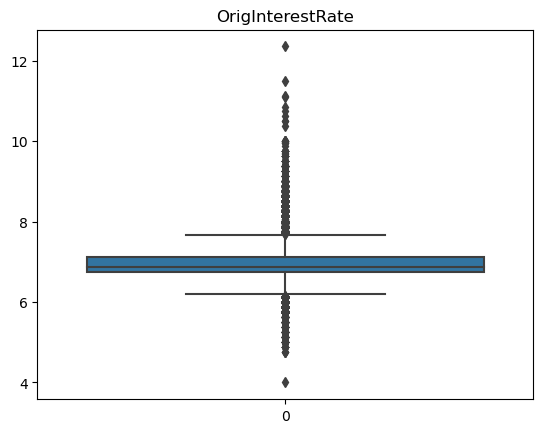

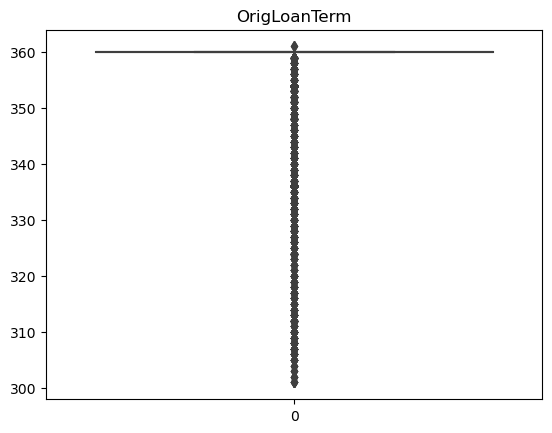

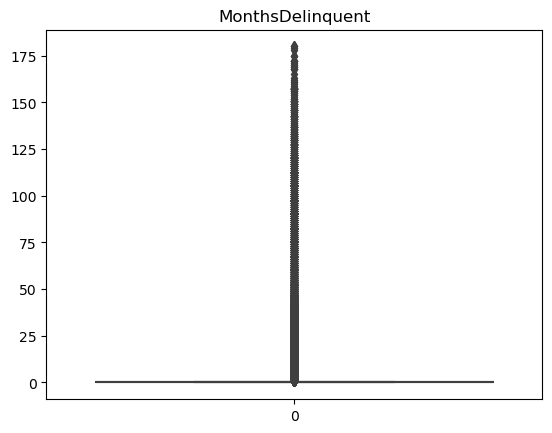

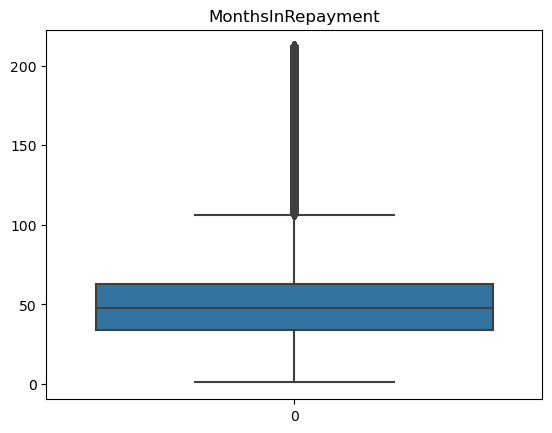

In [23]:
for i in excludedcolumns:
    fig, ax = plt.subplots()
    sns.boxplot(df_train[i], ax=ax)
    ax.set_title(i)
    plt.show()  

we cannot really identify the reason for these outliers so we will leave it and see after our model results whether we can do anything

In [24]:
for i in categoricalcolumns:
    print(i,df_train[i].value_counts())

FirstTimeHomebuyer N    184154
X     78015
Y     29282
Name: FirstTimeHomebuyer, dtype: int64
Occupancy O    276131
I      8734
S      6586
Name: Occupancy, dtype: int64
Channel T    167670
R    123219
C       407
B       155
Name: Channel, dtype: int64
PPM N    282125
X      5405
Y      3921
Name: PPM, dtype: int64
ProductType FRM      291451
Name: ProductType, dtype: int64
PropertyType SF    244923
PU     27506
CO     18100
MH       723
LH       105
CP        72
X         22
Name: PropertyType, dtype: int64
LoanPurpose P    123404
N    110036
C     58011
Name: LoanPurpose, dtype: int64
NumBorrowers 2     187335
1     103777
X        339
Name: NumBorrowers, dtype: int64
EverDelinquent 0    233788
1     57663
Name: EverDelinquent, dtype: int64


**if we see in first time homebuyer there is another category as x,and in occupancy one category is dominating,and there aare 4 channels in which x and y are far more less compared to other one,in product type only frm is there,and in property type three are dominating,and in loan purpose only x is least(so we have to identify suitable one to replace them because they might cause data redundancy issues)**

1)in firsttime homebuyer i will replace x with n because aperson might be buying or might not be buying there are only two options so i am replacing with no

2)Occupancy type is important because it indicates to a lender the lengths to which a borrower will go before they give up making payments on their mortgage.To understand this, imagine you own two properties, each with their own mortgage.
One property is your home, where your spouse or kids live, or where you spend most of your time. This is your principal residence. The other property is a duplex that you rent out. This is your investment property.Now, imagine you faced a significant financial hardship, and you could only afford to keep making payments on one of your two mortgages. 0-own house(one-to-four unit family home) S-secondary(vaccation home) I-investmet house(most important)

3)PPM-prepayment penalty mortgage Prepayment penalties are written into mortgage contracts by lenders to compensate for prepayment risk, particularly in difficult economic climates and under circumstances where the incentive for a borrower to refinance a subprime mortgage is high. These penalties don’t only kick in when a borrower pays off the entire loan. Some penalty provisions go into effect if the borrower pays a large portion of the loan balance in a single payment.(so i will also replace here with mode)

**1)first time homebuyer**

In [25]:
df_train['FirstTimeHomebuyer']=df_train['FirstTimeHomebuyer'].replace(to_replace=["N","X","Y"],value=["NO","NO","YES"],regex=True)
df_train['FirstTimeHomebuyer'].value_counts()

NO     262169
YES     29282
Name: FirstTimeHomebuyer, dtype: int64

**2)**channel

In [26]:
df_train["Channel"]=df_train["Channel"].replace(to_replace=["T","R","C","B"],value=["Traditional Mortgage","Retail banking","Retail banking","Retail banking"],regex=True)
df_train["Channel"].value_counts()

Traditional Mortgage    167670
Retail banking          123781
Name: Channel, dtype: int64

In [27]:
df_train.head()

,CreditScore,FirstTimeHomebuyer,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyType,LoanPurpose,OrigLoanTerm,NumBorrowers,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,558.0,NO,25.0,1.0,O,89.0,27.0,117000.0,89.0,6.750,Traditional Mortgage,N,FRM,SF,P,360,2,0,0,52
1,558.0,NO,0.0,1.0,O,73.0,17.0,109000.0,73.0,6.500,Retail banking,N,FRM,SF,N,360,1,0,0,144
2,558.0,NO,0.0,1.0,O,75.0,16.0,88000.0,75.0,6.875,Traditional Mortgage,N,FRM,SF,N,360,2,0,0,67
3,558.0,NO,0.0,1.0,O,76.0,14.0,160000.0,76.0,6.875,Retail banking,N,FRM,SF,N,360,2,0,0,35
4,558.0,NO,0.0,1.0,O,78.0,18.0,109000.0,78.0,7.125,Retail banking,N,FRM,SF,N,360,2,0,0,54


*The number of months in delinquency and the number of months in repayment are related in the sense that delinquency occurs when a borrower is behind on their loan payments. The number of months in delinquency represents the length of time that a borrower has been late on their payments, while the number of months in repayment represents the length of time that a borrower has been making payments on their loan.*

**Analysis of our target column**

***1 Checking imbalance in data***

In [28]:
# Finding % of people with deliquent and not deliquent

target_0_percentage = (round (len(df_train.query('EverDelinquent=="0"'))/len(df_train),4)) * 100
print ("Target_0_percentage:", target_0_percentage,"%")

target_1_percentage = (round (len(df_train.query('EverDelinquent=="1"'))/len(df_train),4)) * 100
print ("Target_1_percentage:", target_1_percentage,"%")

Target_0_percentage: 80.22 %
Target_1_percentage: 19.78 %


**As the percentage of 0 and 1 are different, there is an imbalance**

*Creation of two data sets - one for each Target = 1 and Target = 0*

In [29]:
 # Creating Dataframe of the non-defaulters  
deliquent_0_df = df_train.query('EverDelinquent=="0"')
deliquent_1_df = df_train.query('EverDelinquent=="1"')

In [30]:
print(deliquent_0_df.shape)
print(deliquent_1_df.shape)

(233788, 20)
(57663, 20)


In [31]:
 categoricalcolumns=[]
 numericalcolumns=[]
 for i in df_train.columns:
   if df_train[i].dtypes==object:
      categoricalcolumns.append(i)
   else:
      numericalcolumns.append(i)
print(numericalcolumns) 
print(categoricalcolumns)

['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'MonthsDelinquent', 'MonthsInRepayment']
['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType', 'PropertyType', 'LoanPurpose', 'NumBorrowers', 'EverDelinquent']


In [32]:
categoricalcolumns.remove('EverDelinquent')

*** Univariate Analysis for categorical variable***

*Under univariate analysis, we will look at percentage distribution of values of categorial variable*

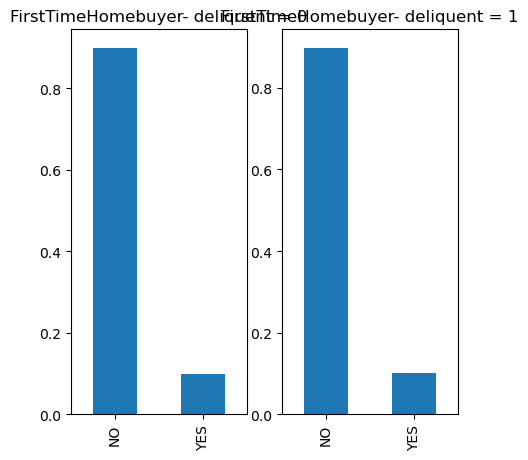

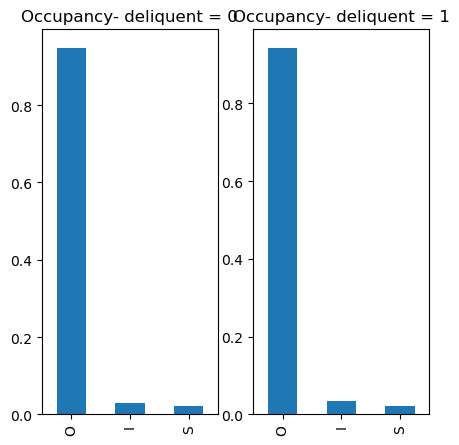

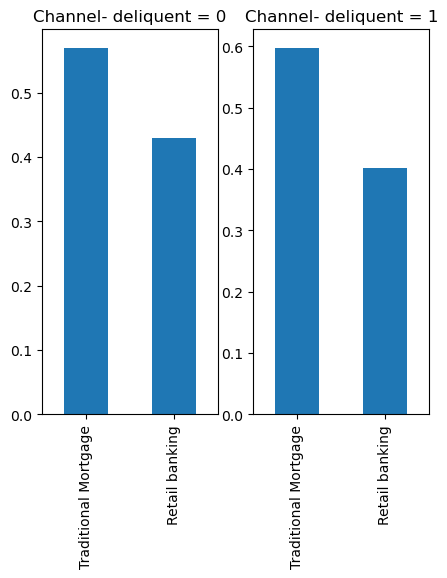

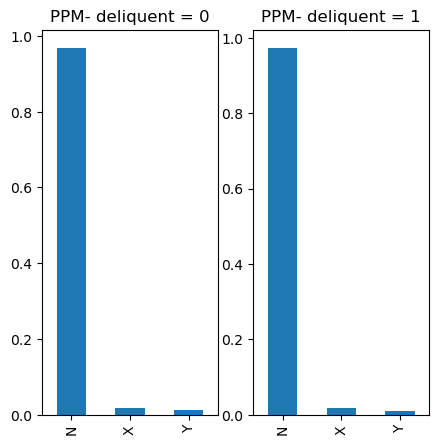

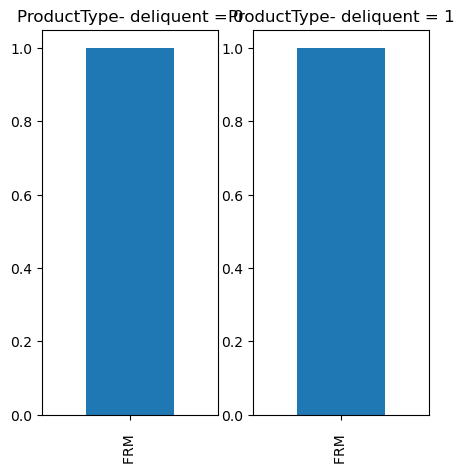

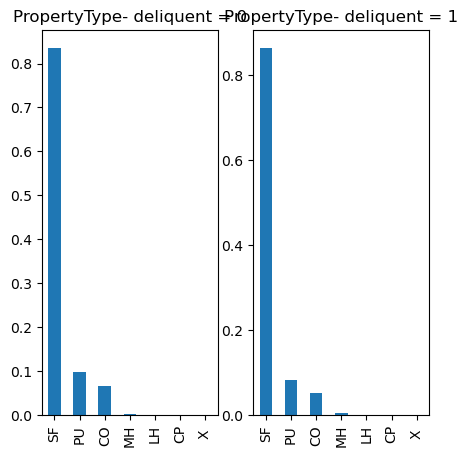

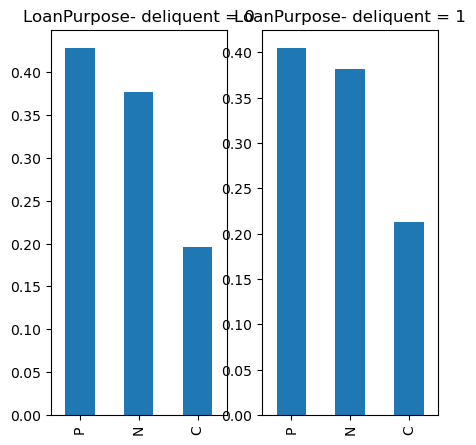

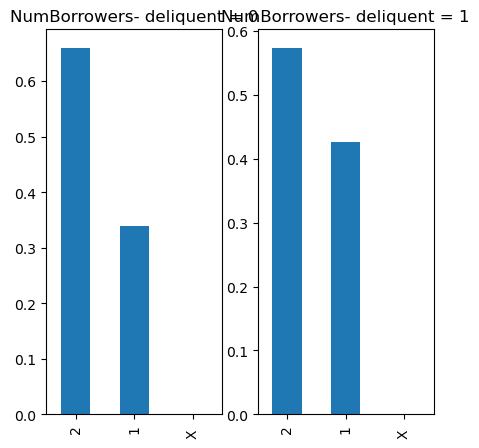

In [33]:
#loop for performing univariate analysis
for i in categoricalcolumns:
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    deliquent_0_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- deliquent = 0')
    plt.subplot(1,2,2)
    deliquent_1_df[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- deliquent = 1')

#highlights from the plot 
1)**num of borrowers are more for target 1 deliquent which means persons who are deliquate has borrowed from one source**
2**even in loan purpose the category c are deliqueating more in case of target 1**
3)**even in channel  the category traditional mortgage are deliqueating more in case of target 1**

In [34]:
#lets plot heatmaps

<AxesSubplot:>

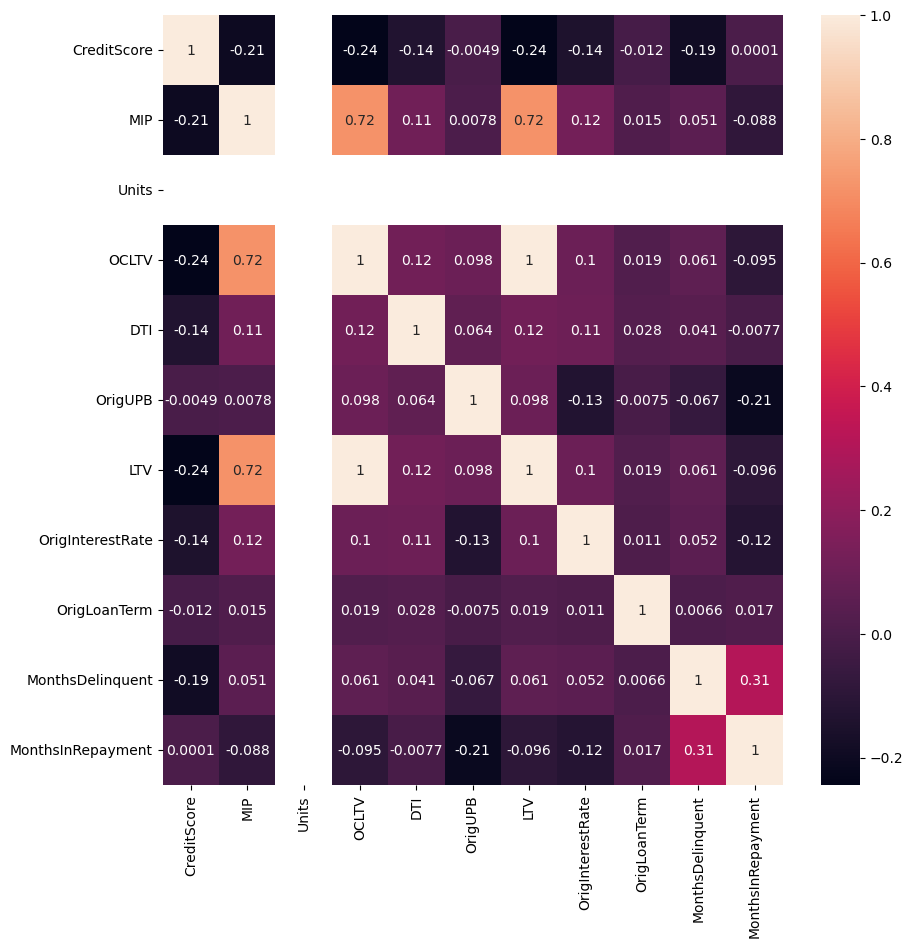

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)

Text(0.5, 1.0, 'heatmap- Target = 1')

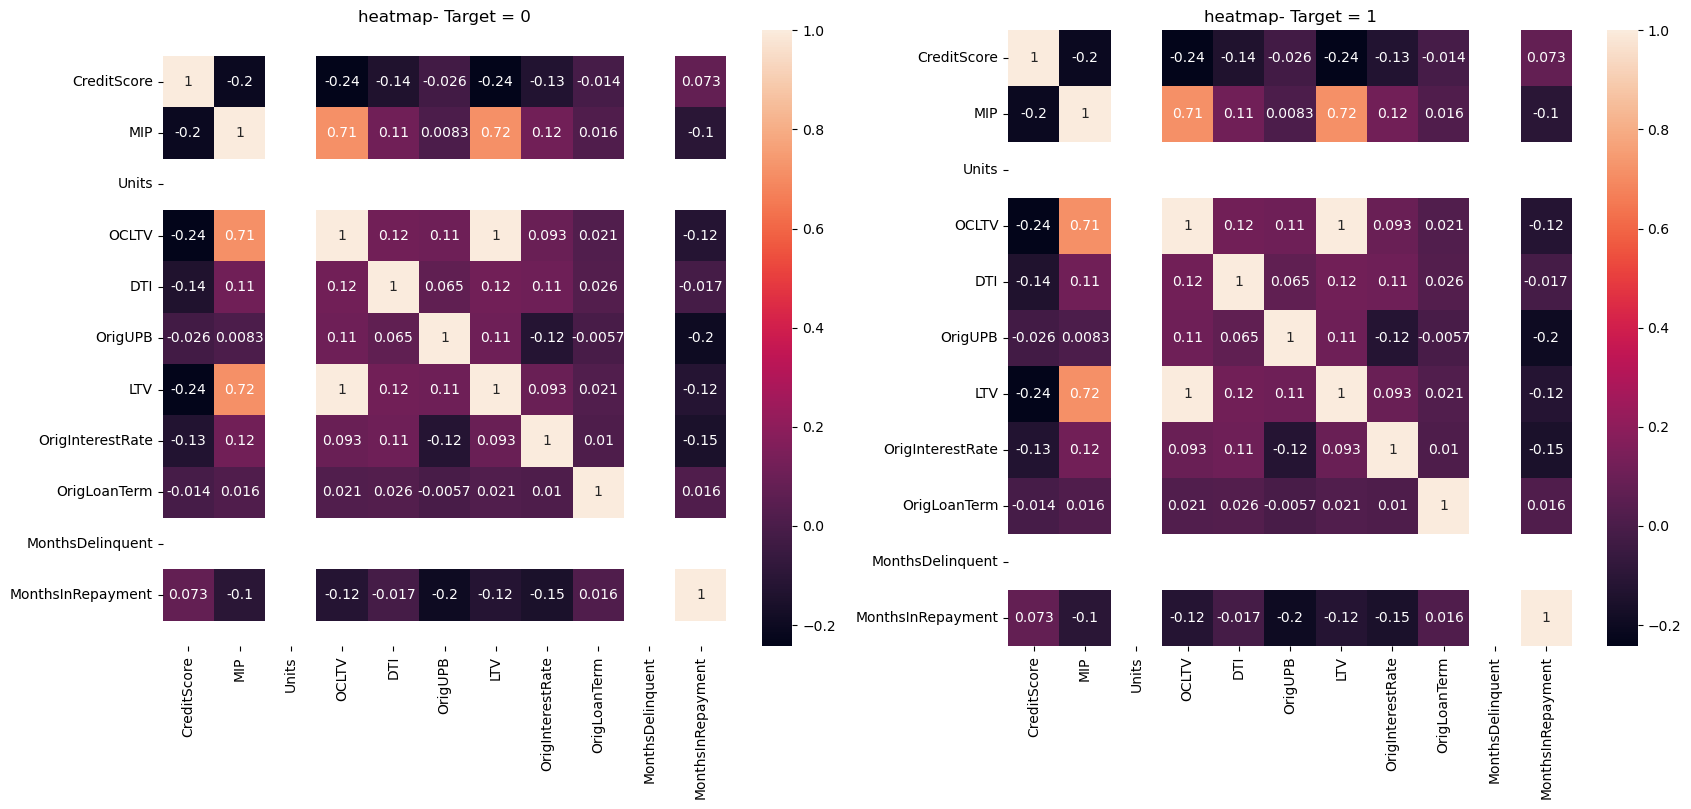

In [36]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(deliquent_0_df[numericalcolumns].corr(),annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.yticks(rotation = 0)
plt.title('heatmap- Target = 0')
plt.subplot(1,2,2)
sns.heatmap(deliquent_0_df[numericalcolumns].corr(),annot=True,)
plt.title('heatmap- Target = 1')


Through the heatmap we can see same set of columns seem to have a high correlation across all three data sets. Top correlate colums are:
ltv vs mip 
ltv,ocltv vs credit score
ltv vs ocltv


In [37]:
#now we have to select best feautures for model building but we will first try to build model using all the features


In [42]:
for i in categoricalcolumns:
    print(i,df_train[i].nunique())

FirstTimeHomebuyer 2
Occupancy 3
Channel 2
PPM 3
ProductType 1
PropertyType 7
LoanPurpose 3
NumBorrowers 3


In [43]:
categoricalcolumnsle=["FirstTimeHomebuyer","Channel","ProductType",]

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categoricalcolumnsle:
    df_train[i] = le.fit_transform(df_train[i])

In [45]:
df_train= pd.get_dummies(df_train, columns=['Occupancy',
 'PPM',
 'PropertyType',
 'LoanPurpose',
 'NumBorrowers'],drop_first=True)

In [46]:
#Normalizing and Scaling( Numerical Variables)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [59]:
std_scale=StandardScaler()
std_scale


StandardScaler()

In [60]:
df_train["EverDelinquent"]=df_train["EverDelinquent"].astype("int")

In [49]:
for i in numericalcolumns:
    df_train[i]=std_scale.fit_transform(df_train[[i]])

In [50]:
X= df_train.drop(["EverDelinquent"],axis=1)
y= df_train["EverDelinquent"]
print(X.shape)

(291451, 28)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [62]:
print(X_train.shape)
print(X_test.shape)

(195272, 28)
(96179, 28)


In [63]:
#building a simple ann model for classification
import keras
from keras.models import Sequential
from keras.layers import Dense, Normalization,BatchNormalization
from keras import regularizers
from keras.utils.metrics_utils import ConfusionMatrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [87]:
#simple ann neural network
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresholds:
 perceptron1 = Sequential()
 perceptron1.add(Dense(1,activation='sigmoid'))
 perceptron1.compile(optimizer='rmsprop',loss=keras.losses.BinaryCrossentropy())#Adam
 perceptron1.fit(X_train,y_train,epochs=5)
 trainpreds= perceptron1.predict(X_train)>i
 testpreds= perceptron1.predict(X_test)>i
 print(i,"train-",accuracy_score(y_train,trainpreds),"test-",accuracy_score(y_test,testpreds))
 
 

Epoch 1/5
6103/6103 [==============================] - 10s 2ms/step - loss: 0.4543
Epoch 2/5
6103/6103 [==============================] - 10s 2ms/step - loss: 0.4039
Epoch 3/5
6103/6103 [==============================] - 9s 2ms/step - loss: 0.3859
Epoch 4/5
6103/6103 [==============================] - 9s 2ms/step - loss: 0.3725
Epoch 5/5
3006/3006 [==============================] - 3s 1ms/step
0.1 train- 0.544066737678725 test- 0.5407625365204463
Epoch 1/5
6103/6103 [==============================] - 10s 2ms/step - loss: 0.4507
Epoch 2/5
6103/6103 [==============================] - 10s 2ms/step - loss: 0.4034
Epoch 3/5
6103/6103 [==============================] - 9s 2ms/step - loss: 0.3853
Epoch 4/5
6103/6103 [==============================] - 9s 2ms/step - loss: 0.3720
Epoch 5/5
3006/3006 [==============================] - 3s 1ms/step
0.2 train- 0.7992441312630587 test- 0.7973778059659593
Epoch 1/5
6103/6103 [==============================] - 10s 2ms/step - loss: 0.4438
Epoch 2/5
6103

**from this we can clearly see threshold of 0.4 is having good results so we will use it for confusion matrix analysis**

In [89]:
perceptron1 = Sequential()
perceptron1.add(Dense(1,activation='sigmoid'))
perceptron1.compile(optimizer='rmsprop',loss=keras.losses.BinaryCrossentropy())#Adam
perceptron1.fit(X_train,y_train,epochs=5)
trainpreds= perceptron1.predict(X_train)>0.4
testpreds= perceptron1.predict(X_test)>0.4
print(i,"train-",accuracy_score(y_train,trainpreds),"test-",accuracy_score(y_test,testpreds))
print(confusion_matrix(y_train,trainpreds))
print(confusion_matrix(y_test,testpreds))

Epoch 1/5
6103/6103 [==============================] - 11s 2ms/step - loss: 0.4495
Epoch 2/5
6103/6103 [==============================] - 11s 2ms/step - loss: 0.4038
Epoch 3/5
6103/6103 [==============================] - 11s 2ms/step - loss: 0.3860
Epoch 4/5
6103/6103 [==============================] - 11s 2ms/step - loss: 0.3726
Epoch 5/5
3006/3006 [==============================] - 4s 1ms/step
0.9 train- 0.8629706255889221 test- 0.8622360390521839
[[153492   3146]
 [ 23612  15022]]
[[75519  1631]
 [11619  7410]]


In [94]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score=precision_score(y_train,trainpreds)
recall_score=recall_score(y_train,trainpreds)
f1_score=f1_score(y_train,trainpreds)
print("scores for train",precision_score, recall_score,f1_score)


scores for train 0.8268383971818583 0.3888284930372211 0.5289250378507798


***there are large ammount of false positives and false negatives in the prediction given by the model so we should go for another model with different parameters. ***

In [69]:
#model 2 to reduce fp and fn
from keras.layers import Dropout,BatchNormalization,Normalization
model2 = Sequential()
model2.add(Dense(8,activation='relu')) #0 -- max
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))# binary ; multiclass softmax
model2.compile(optimizer='Adam',loss=keras.losses.BinaryCrossentropy())
model2.fit(X_train,y_train,epochs=20)

Epoch 1/20
6103/6103 [==============================] - 12s 2ms/step - loss: 0.3319
Epoch 2/20
6103/6103 [==============================] - 11s 2ms/step - loss: 0.0743
Epoch 3/20
6103/6103 [==============================] - 11s 2ms/step - loss: 0.0030
Epoch 4/20
6103/6103 [==============================] - 11s 2ms/step - loss: 2.0067e-04
Epoch 5/20
6103/6103 [==============================] - 11s 2ms/step - loss: 8.4622e-04
Epoch 6/20
6103/6103 [==============================] - 11s 2ms/step - loss: 2.6538e-06
Epoch 7/20
6103/6103 [==============================] - 11s 2ms/step - loss: 1.8722e-06
Epoch 8/20
6103/6103 [==============================] - 12s 2ms/step - loss: 1.2006e-04
Epoch 9/20
6103/6103 [==============================] - 11s 2ms/step - loss: 7.9486e-07
Epoch 10/20
6103/6103 [==============================] - 11s 2ms/step - loss: 3.7910e-07
Epoch 11/20
6103/6103 [==============================] - 11s 2ms/step - loss: 1.3336e-04
Epoch 12/20
6103/6103 [===================

In [70]:
trainpreds= model2.predict(X_train)>0.3
print(trainpreds[0:10])
testpreds= model2.predict(X_test)>0.3
print(testpreds[0:10])

6103/6103 [==============================] - 8s 1ms/step
[[False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]]
3006/3006 [==============================] - 4s 1ms/step
[[False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [73]:
from keras.utils.metrics_utils import ConfusionMatrix
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
print("a.s for train",accuracy_score(y_train,trainpreds))
print("a.s for test",accuracy_score(y_test,testpreds))

print("confusion_matrix for train",confusion_matrix(y_train,trainpreds))
print("confusion_matrix for test",confusion_matrix(y_test,testpreds))

a.s for train 1.0
a.s for test 1.0
confusion_matrix for train [[156638      0]
 [     0  38634]]
confusion_matrix for test [[77150     0]
 [    0 19029]]


Now lets try with different models
1)decision tree classifier
2)random forest classifer
3)knn classifer
4)logistic regression

In [106]:
#model-logiticregression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Train the classifier on the training data
lr.fit(X_train, y_train)
# Make predictions on the training data
train_preds = lr.predict(X_train)

# Make predictions on the testing data
test_preds = lr.predict(X_test)

# Evaluate the performance of the classifier using accuracy, precision, recall, and f1-score
print("trainaccuracy",accuracy_score(y_train,train_preds))
print("confusionaccuracy",confusion_matrix(y_train,train_preds))
print("testaccuracy",accuracy_score(y_test,test_preds))
print("confusionaccuracy",confusion_matrix(y_test,test_preds))

trainaccuracy 0.899294317669712
confusionaccuracy [[156604     34]
 [ 19631  19003]]
testaccuracy 0.899884590191206
confusionaccuracy [[77128    22]
 [ 9607  9422]]


In [107]:
#model2-decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training data
lr.fit(X_train, y_train)
# Make predictions on the training data
train_preds = lr.predict(X_train)

# Make predictions on the testing data
test_preds = lr.predict(X_test)

# Evaluate the performance of the classifier using accuracy, precision, recall, and f1-score
print("trainaccuracy",accuracy_score(y_train,train_preds))
print("confusionaccuracy",confusion_matrix(y_train,train_preds))
print("testaccuracy",accuracy_score(y_test,test_preds))
print("confusionaccuracy",confusion_matrix(y_test,test_preds))

trainaccuracy 1.0
confusionaccuracy [[156638      0]
 [     0  38634]]
testaccuracy 1.0
confusionaccuracy [[77150     0]
 [    0 19029]]


In [109]:
#Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
lr.fit(X_train, y_train)
# Make predictions on the training data
train_preds = lr.predict(X_train)

# Make predictions on the testing data
test_preds = lr.predict(X_test)

# Evaluate the performance of the classifier using accuracy, precision, recall, and f1-score
print("trainaccuracy",accuracy_score(y_train,train_preds))
print("confusionaccuracy",confusion_matrix(y_train,train_preds))
print("testaccuracy",accuracy_score(y_test,test_preds))
print("confusionaccuracy",confusion_matrix(y_test,test_preds))

trainaccuracy 1.0
confusionaccuracy [[156638      0]
 [     0  38634]]
testaccuracy 1.0
confusionaccuracy [[77150     0]
 [    0 19029]]
